# Partie 1 : méthodes de gradient

Le but de cette première partie du TP est de programmer, valider et expérimenter l’algorithme du **gradient à pas fixe (GF)** et à **gradient à pas optimal (GO)**. Pour faciliter les comparaisons, les 2 variantes seront implémentées dans le même programme. Pour les expérimentations et validations, on considèrera les fonctions suivantes:

$$
J_{1}(v)=\sum_{i=1}^{i=N}\left(v_{i}-1\right)^{2}, \quad J_{2}(v)=\sum_{i=1}^{i=N}\left(v_{i}-i\right)^{2}, \quad J_{R}(v)=\sum_{i=1}^{i=N-1}\left\{\left(v_{i+1}-v_{i}^{2}\right)^{2}+\left(v_{i}-1\right)^{2}\right\}
$$

> Préciser les gradients, et les solutions optimales exactes pour ces 3 fonctions coût.

-
-


$$
\nabla J_1 (v),\quad\quad \nabla J_2 (v),\quad\quad \nabla J_R (v) ~~ ?
$$

In [1]:
import numpy as np

In [10]:
a = [1, 2, 3]
a[:-1]

[1, 2]

In [218]:
# retourne la valeur de la fonction et de sont gradient

def J1 (v): 
    N = len(v)
    ones = np.ones(N)
    return [np.dot(v-ones,v-ones), 2*(v-ones)]

def J2 (v):
    N = len(v)
    i = np.arange(1, N+1)
    return [np.dot(v-i, v-i), 2*(v-i)]

## JR Rosenbrock
def JR (v):
    v = np.array(v)
    N = len(v)
    ones = np.ones(N-1)

    # JR Values
    vect1 = v[1:] - (v[:-1]*v[:-1])
    vect2 = v[:-1] - ones
    values = np.dot(vect1, vect1) + np.dot(vect2, vect2)

    # JR Gradient
    vect1 = 2*(v[:-1] - ones) - 4*v[:-1]*(v[1:] - v[:-1]**2)
    vect2 = 2*(v[1:] - v[:-1]**2)
    gradient = np.append(vect1, 0) + np.insert(vect2, 0, 0)

    return [values, gradient]

Evaluations des fonctions et de leurs gradients :

In [57]:
## prendre des exemples test

v = np.array([1,2,1]) 
J1(v)

[J0,G0] = J1(v)

print ('La valeur de J_1 en v={} est égale à {}'.format(v,J0))
print (r'Le gradient de J_1 en v={} est égale à {}'.format(v,G0))

La valeur de J_1 en v=[1 2 1] est égale à 1.0
Le gradient de J_1 en v=[1 2 1] est égale à [0. 2. 0.]


In [58]:
J2([1, 2, 3])

[0, array([0, 0, 0])]

In [59]:
JR([1, 2, 3])

[3.0, array([-4., 12., -2.])]

Traçage des fonctions par rapport à la dernière variable :

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

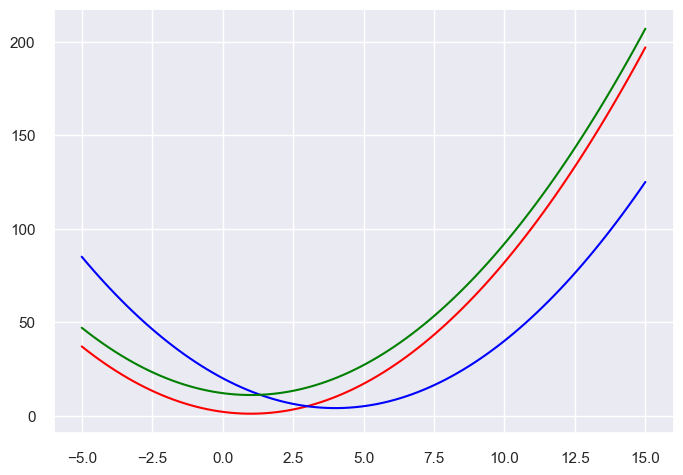

In [64]:
## Ici on trace J(1,2,1,x) avec x entre -5 et 15 juste pour voir ces variations par rapport à une variable (la dernière)

x = np.linspace(-5,15,100)
v =np.array([1,2,1])

y1 = [J1(np.append(v,xi))[0] for xi in x]
y2 = [J2(np.append (v,xi))[0] for xi in x]
yR = [JR(np.append (v,xi))[0] for xi in x]

plt.plot(x,y1,color="red")
plt.plot(x,y2,color="blue")
plt.plot(x,yR,color="green")

## Etape 1.
> Rappeler les trois versions GF, GV et GO, et identifier l’ensemble des données utilisateur, numériques, et de contrôle.

-
-
-

## Etape 2.
- Ecrire le programme GF (utiliser les modules déjà définis de calcul de la fonction coût et de son gradient pour les fonctions $J_1$, $J_2$, $J_R$).
- Effectuer les tests de validation de GF pour les fonctions $J_1$ et $J_2$ ($N = 10,20,40$) : On prendra un pas fixe $t = 1$, qu’observe t-on et pourquoi ? puis prendre $t=0.1$ et ensuite $t = 0.5$.

**Pseudocode**

>  
- Initiaisation: $u_0 \in {\mathbb R}^n$ arbitraire et pas $t>0$
- Itérations: répéter pour $k=0,1,\dots$   
  - calculer le gradient $\nabla f (u_{k})$;
  - calculer $u_{k+1} = u_{k} - t \nabla f (u_{k})$;
- Critère d'arrêt:  $\|\nabla f (u_{k}) \|_2 \leq \epsilon$ $\big($on utilise ici la norme euclidienne $\|\cdot \|_2$ $\big)$


In [112]:
# Modifier ici le choix de fonction, J1, J2, JR
def cost(v):
  return J1(v)

In [220]:
def gradient_fixe(J, t=1):
    """
    Algorithme de descente de gradent utilisant le pas fixe 
    params: t [1, 0.1, 0.5]
    Output: k(iteration), u(optimal_solution)
    """
    N=10            # nombre de variables d'optimisation (ou dimension du probleme)
    eps = 1.e-7     # tolerance sur la norme du gradient
    Kmax = 1500     # nombre max d'iterations

    # First guess : u0
    u0 = np.zeros(N)
    k = 0
    u = u0

    # Itération de GF
    while True:
        grad = J(u)[1]
        if np.linalg.norm(grad) < eps or k == Kmax:
            break
        u = u - (t*grad)
        k += 1
        
    # Arret
    print(f"PAS={t}\t - Nombre d'itération: {k}\t - Vecteur u*: {u}")

gradient_fixe(J1, 1)
gradient_fixe(J1, 0.1)
gradient_fixe(J1, 0.5)

PAS=1	 - Nombre d'itération: 1500	 - Vecteur u*: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
PAS=0.1	 - Nombre d'itération: 81	 - Vecteur u*: [0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999]
PAS=0.5	 - Nombre d'itération: 1	 - Vecteur u*: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Etape 3.
> Dans cette étape on va construire l’approximation parabolique de la fonction $f(t) = J(u_k − t\nabla J(u_k))$, qui utilise $f(0)$, $f′(0)$ et $f(t_{k−1})$. S’en servir pour implémenter une approximation du calcul du pas optimal $t_k$. Valider GO sur les cas $J_1$ et $J_2$. Comparer ensuite GF et GO sur $J_R$ (tracer, sur le même graphique, les 2 courbes de convergence des coûts en fonction des itérations).

Etant donné $u_k$, la valeur $J(u_k)$ et le gradient $\nabla J(u_k)$, on propose d'approcher $J$ par un modèle quadratique au voisinage de $u_k$ le long du gradient $G_k:= \nabla J (u_k)$, soit

$$
f(t):= J(u_k- t G_k ) \simeq J(u_k) - t G_k^\top G_k + \gamma_k t^2 =: \tilde{f}(t),
$$
avec $\gamma_k$  un scalaire qu'il faut identifier . On a en particulier,

$$
f(0)=J(u_k),
\quad\quad f'(0)= - G_k^\top G_k.
$$

- En prenant $\tilde{f}(t_{k-1}) = f(t_{k-1})$, **identifier** l'expression de $\gamma_k$ en fonction de $t_{k-1}, f(t_{k-1}), J(u_k)$ et $\nabla J (u_k)$.  
- **En déduire** l'approximation $t_{k}:=\mathop{\mathrm{argmin}}\limits_{t>0}\tilde{f}(t)$ du pas optimal en fonction de $\gamma_k$ et $\nabla J(u_k)$.
- **Implémenter** l'expression du pas optimal approché pour $J_1$, $J_2$ et $J_R$ dans la fonction suivante (où $u$ joue le rôle de $u_{k}$ et $t$ joue le rôle de $t_{k-1}$):


In [179]:
# abstract OptimalStep
def OptimalStep(J, u, t):
  grad = J(u)[1]
  lambda_k = (J(u - t*grad)[0] - J(u)[0] + (t*np.dot(grad.T, grad))) / t**2
  tk = np.dot(grad.T, grad) / (2 * lambda_k)
  return tk

def PasOptJ1(u,t):
  return OptimalStep(J1, u, t)

def PasOptJ2(u,t):
  return OptimalStep(J2, u, t)

def PasOptJR(u,t):
  return OptimalStep(JR, u, t)


**Pseudocode du GO (approché)**

>  
- Initialisation: prende un vecteur $u_0 \in {\mathbb R}^n$ arbitraire et un scalaire arbitraire $t_{-1}>0$
- Itérations: Répéter pour $k=0, 1,\dots$
  - Calculer le pas optimal approché $t_k$;
  - Calculer $u_{k+1} = u_{k} - t_{k} \nabla J (u_{k})$;
- Critère d'arrêt:  $\|\nabla J (u_{k}) \|_2 \leq \epsilon$


Valider cet algorithme GO sur les cas $J_1$ et $J_2$.

In [187]:
def gradient_optimal(PasOptimal, J):
    """
    Algorithme de descente de gradent utilisant la **méthode du pas optimal** 
    Output: k(iteration), u(optimal_solution)
    """
    N=10            # nombre de variables d'optimisation (ou dimension du probleme)
    eps = 1.e-7     # tolerance sur la norme du gradient
    Kmax = 1500     # nombre max d'iterations

    # Premier pas arbitraire, t>0
    t = np.random.uniform(0.1, 4)

    # First guess : u0
    u0 = np.zeros(N)
    k = 0
    u = u0

    # Itération de GF
    while True:
        grad = J(u)[1]
        if np.linalg.norm(grad) < eps or k == Kmax:
            break
        t = PasOptimal(u, t)
        u = u - (t*grad)
        k += 1
        

    # Arret
    print(f"[{PasOptimal.__name__}]\tNombre d'itération: {k}\t - Vecteur u*: {u}")

gradient_optimal(PasOptJ1, J1)
gradient_optimal(PasOptJ2, J2)
gradient_optimal(PasOptJR, JR)

[PasOptJ1]	Nombre d'itération: 1	 - Vecteur u*: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[PasOptJ2]	Nombre d'itération: 1	 - Vecteur u*: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[PasOptJR]	Nombre d'itération: 371	 - Vecteur u*: [1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999997 0.99999994 0.99999984]


Comparer ensuite GF et GO sur  $J_R$  (tracer, sur le même graphique, les 2 courbes de convergence des coûts en fonction des itérations)

In [224]:
# FIXE JR
gradient_fixe(JR, 0.1)
gradient_fixe(JR, 0.101)
gradient_fixe(JR, 0.09)

PAS=0.1	 - Nombre d'itération: 370	 - Vecteur u*: [1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999996 0.99999991 0.99999977]
PAS=0.101	 - Nombre d'itération: 366	 - Vecteur u*: [1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999996 0.99999991 0.99999977]
PAS=0.09	 - Nombre d'itération: 412	 - Vecteur u*: [1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999996 0.99999991 0.99999977]


In [225]:
# OPTIMAL JR
gradient_optimal(PasOptJR, JR)

[PasOptJR]	Nombre d'itération: 350	 - Vecteur u*: [1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999997 0.99999993 0.99999983]


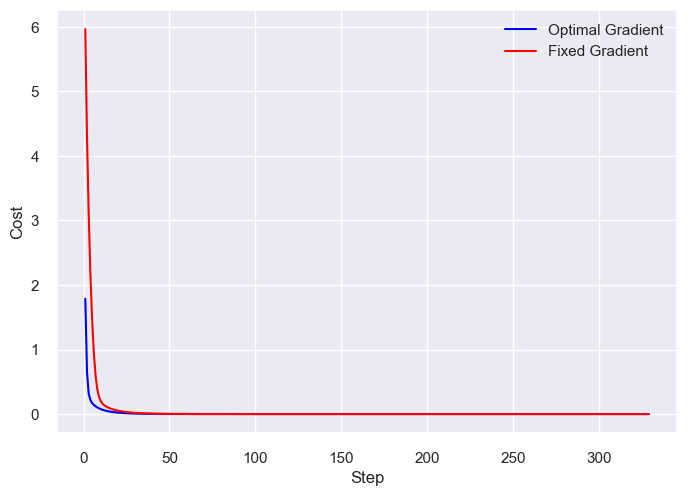

In [254]:
def courbe_de_convergence():
    J = JR
    PasOptimal = PasOptJR

    N=10
    eps = 1.e-7
    Kmax = 329

    # records of step and cost
    step = []
    cost_fix = []
    cost_opt = []

    # OPTIMAL
    t = 0.1
    u0 = np.zeros(N)
    k = 0
    u = u0
    while True:
        grad = J(u)[1]
        if np.linalg.norm(grad) < eps or k == Kmax:
            break
        t = PasOptimal(u, t)
        u = u - (t*grad)
        k += 1
        step.append(k)
        cost_opt.append(J(u)[0])

    # FIXE
    t = 0.1
    u0 = np.zeros(N)
    k = 0
    u = u0
    while True:
        grad = J(u)[1]
        if np.linalg.norm(grad) < eps or k == Kmax:
            break
        u = u - (t*grad)
        k += 1
        cost_fix.append(J(u)[0])
        

    # Plot
    plt.plot(step, cost_opt, color='blue', label='Optimal Gradient')
    plt.plot(step, cost_fix, color='red', label='Fixed Gradient')
    plt.xlabel('Step')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()

courbe_de_convergence()

## Etape 5.
> Etudier les méthodes GF et GO sur le cas de la fonction $J_H (x, y) = (x^2 +y−2)^2 +(y^2 −2x+1)^2$ . On prendra comme guess initial $u_0 = (0, 0)$ puis $u_0 = (1.5, −1.5)$. Que constatez-vous ? Comment valider ce constat ?

In [264]:
## à compléter
def JH(v):
    v = np.array(v)
    n = 2

    # Cost
    value = (v[0]**2 + v[1] - 2)**2 + (v[1]**2 - 2*v[0] + 1)**2

    # Gradient
    x = v[0]
    y = v[1]
    gradient = np.array([4*(x**3-y**2+(x*y)-1), (4*(y**3) + 2*(x**2) + (6*y) - (8*x*y) - 4)])

    return [value, gradient]

In [277]:
# Fixe sur Fh

def gradient_fixe(J,  u0, t=1,):
    eps = 1.e-7     # tolerance sur la norme du gradient
    Kmax = 1500     # nombre max d'iterations

    # First guess : u0

    k = 0
    u = np.array(u0)

    # Itération de GF
    while True:
        grad = J(u)[1]
        if np.linalg.norm(grad) < eps or k == Kmax:
            break
        u = u - (t*grad)
        k += 1
        

    # Arret
    print(f"PAS={t}\t - Nombre d'itération: {k}\t - Vecteur u*: {u}")

gradient_fixe(JH, [0, 0], 0.085)
gradient_fixe(JH, [1.5, -1.5], 0.06)

PAS=0.085	 - Nombre d'itération: 25	 - Vecteur u*: [1. 1.]
PAS=0.06	 - Nombre d'itération: 35	 - Vecteur u*: [0.99999999 0.99999999]


In [287]:
def PasOptJH(u,t):
  return OptimalStep(JH, u, t)

def gradient_optimal(PasOptimal, J, u0):
    eps = 1.e-7     # tolerance sur la norme du gradient
    Kmax = 1500     # nombre max d'iterations

    # Premier pas arbitraire, t>0
    t = np.random.uniform(0.1, 4)

    # First guess : u0
    u = np.array(u0)
    k = 0

    # Itération de GF
    while True:
        grad = J(u)[1]
        if np.linalg.norm(grad) < eps or k == Kmax:
            break
        t = PasOptimal(u, t)
        u = u - (t*grad)
        k += 1

    # Arret
    print(f"[{PasOptimal.__name__}]\tNombre d'itération: {k}\t - Vecteur u*: {u}")

gradient_optimal(PasOptJH, JH, [0, 0])

[PasOptJH]	Nombre d'itération: 18	 - Vecteur u*: [1.         1.00000001]
